In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
def get_data_from_LTS(arx):
        
    with open(arx, "r") as f:
        lines= f.readlines()

    d= {  "Aten [dB]":[]  , "Fase [DEG]":[] , "Freq [Hz]":[] }

    for line in lines:

        f, z = line.split("\t")

        d["Freq [Hz]"].append( float(f) )

        A_, ph_ = z.split(",")

        A = A_.split("dB")[0].split("(")[-1]
        ph = ph_[:-3]

        d["Aten [dB]"].append( float(A) )
        d["Fase [DEG]"].append( float(ph) )


    df = pd.DataFrame( data=d )

    df.head()

    return df

## Pasabanda

In [102]:
arx = "barrido_freq_filtro_pasa_banda_RLC_R=100.txt"

df100 = get_data_from_LTS(arx)


arx = "barrido_freq_filtro_pasa_banda_RLC_R=50.txt"

df50 = get_data_from_LTS(arx)



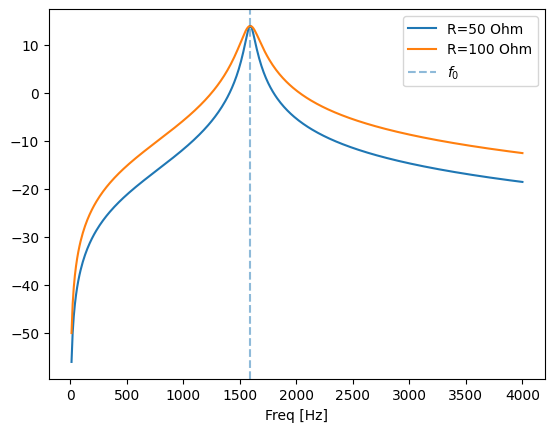

In [103]:
fig,ax= plt.subplots()


df50.plot( x="Freq [Hz]", y="Aten [dB]", ax=ax, label='R=50 Ohm' )

df100.plot( x="Freq [Hz]", y="Aten [dB]", ax=ax , label='R=100 Ohm')

ax.axvline( 1.5915e3, linestyle='--', alpha=0.5, label="$f_0$" )

plt.legend()
plt.show()

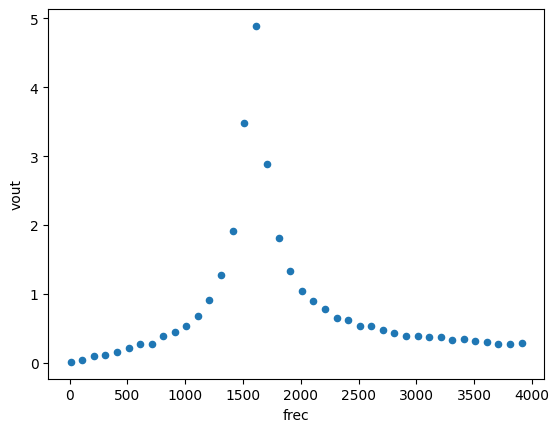

In [104]:
Freq = df100["Freq [Hz]"].to_numpy()

Fase = df100["Fase [DEG]"].to_numpy()

Vout = [ np.power(10, a/20.) for a in df100["Aten [dB]"].to_numpy()]


d = { "frec":[], "vin":[], "vout":[], "desfase":[] }


for f, vout,ph in zip( Freq[::10], Vout[::10], Fase[::10] ):

    u =0.05

    vin1 = 5 + np.random.random()*u
    vout1 = vout +np.random.random()*u
    f1= f#+ np.random.random()*u

    d["frec"].append(f1)
    d["vin"].append(vin1)
    d["vout"].append(vout1)
    d["desfase"].append(ph)

df = pd.DataFrame( data=d )


df.plot( x="frec", y="vout", kind='scatter' )


df.head()

df.to_csv( "fpasabanda_R100.csv", index=False )
    

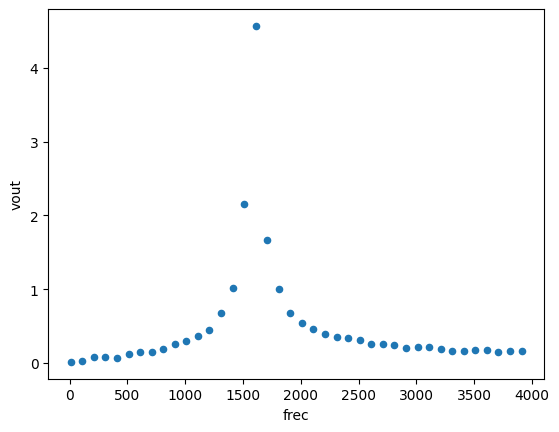

In [105]:
Freq = df50["Freq [Hz]"].to_numpy()

Vout = [ np.power(10, a/20.) for a in df50["Aten [dB]"].to_numpy()]

Fase = df50["Fase [DEG]"].to_numpy()


d = { "frec":[], "vin":[], "vout":[], "desfase":[]  }


for f, vout,ph in zip( Freq[::10], Vout[::10], Fase[::10] ):

    u =0.05

    vin1 = 5 + np.random.random()*u
    vout1 = vout +np.random.random()*u
    f1= f#+ np.random.random()*u

    d["frec"].append(f1)
    d["vin"].append(vin1)
    d["vout"].append(vout1)
    d["desfase"].append(ph)

df = pd.DataFrame( data=d )


df.plot( x="frec", y="vout", kind='scatter' )


df.head()

df.to_csv( "fpasabanda_R50.csv", index=False )
    

# PASA BAJOS RC

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f       100 non-null    float64
 1   T       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


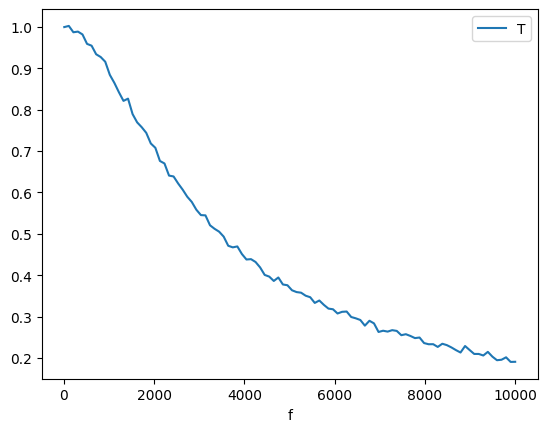

In [22]:
arx = "RC_PB.txt"

df = pd.read_csv(arx, sep='\t', header=None, skiprows=1, names=['f', 'T'])

# Tomo solo la parte real, como es la magnitud la parte img es nula
df_T = pd.to_numeric( df['T'].str.split(',', expand=True)[0] )

# agrego ruido para darle realismo
mean = 0
std_dev = 0.005
ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df_T))

df["T"]= df_T + ruido

# info
df.plot(x='f', y='T')

print(df.info())

# guardo
df.to_csv("RC_PB.csv", index=False)


# PASA BAJOS RL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f       100 non-null    float64
 1   T       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


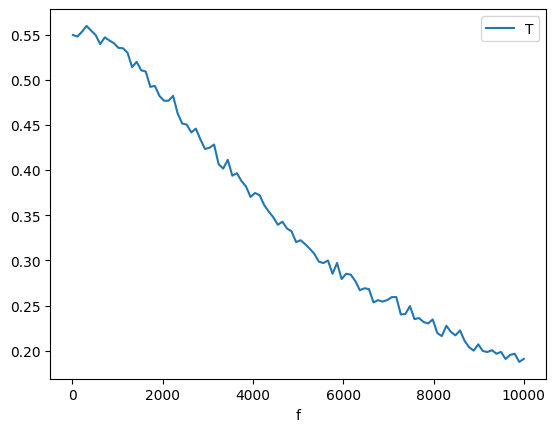

In [3]:
arx = "RL_PB.txt"

df = pd.read_csv(arx, sep='\t', header=None, skiprows=1, names=['f', 'T'])

# Tomo solo la parte real, como es la magnitud la parte img es nula
df_T = pd.to_numeric( df['T'].str.split(',', expand=True)[0] )

# agrego ruido para darle realismo
mean = 0
std_dev = 0.005
ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df_T))

df["T"]= df_T + ruido

# info
df.plot(x='f', y='T')

print(df.info())

# guardo
df.to_csv("RL_PB.csv", index=False)

# PASA ALTOS RL

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f       100 non-null    float64
 1   T       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB
None


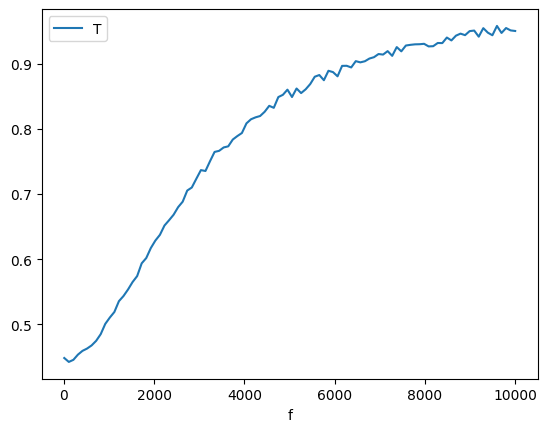

In [4]:
arx = "RL_PA.txt"

df = pd.read_csv(arx, sep='\t', header=None, skiprows=1, names=['f', 'T'])

# Tomo solo la parte real, como es la magnitud la parte img es nula
df_T = pd.to_numeric( df['T'].str.split(',', expand=True)[0] )

# agrego ruido para darle realismo
mean = 0
std_dev = 0.005
ruido = np.random.normal(loc=mean, scale=std_dev, size=len(df_T))

df["T"]= df_T + ruido

# info
df.plot(x='f', y='T')

print(df.info())

# guardo
df.to_csv("RL_PA.csv", index=False)